### Brast Cancer Cell Classification

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [128]:
data = pd.read_csv("breastCancer.csv")

In [129]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Data Preprocessing

In [130]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [131]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [132]:
# bare_nucleoli should be int64 as well, but did not appear as so
# Lets visualize

pd.set_option('display.max_rows', 700)
data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
30      1
31      1
32      5
33      1
34      1
35      1
36      1
37      1
38     10
39      7
40      ?
41      3
42     10
43      1
44      1
45      1
46      9
47      1
48      1
49      8
50      3
51      4
52      5
53      8
54      8
55      5
56      6
57      1
58     10
59      2
60      3
61      2
62      8
63      2
64      1
65      2
66      1
67     10
68      9
69      1
70      1
71      2
72      1
73     10
74      4
75      2
76      1
77      1
78      3
79      1
80      1
81      1
82      1
83      2
84      9
85      4
86      8
87     10
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      6
99     10


In [133]:
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [134]:
# Another way to verify such anormalities is summing:

data[data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [135]:
# Or even, we can use the is digit function>

digits_in_bare_nucleoli = pd.DataFrame(data.bare_nucleoli.str.isdigit())

digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [136]:
# One approach rather than just removing the rows with ? is replace that with NaN

df = data.replace('?',np.nan)

In [137]:
# After changing that into an NaN value
# We can replace NaN by either the MEAN or the MEDIAN of the collum
# In this way we do not loose the data

In [138]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [139]:
# We will replace NaN with the median
df = df.fillna(df.median())

In [140]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [141]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [142]:
# Although we inserted and integer in the df collumn, the type is still Object
# We need to make sure all the data is integer

df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [143]:
# Now we are ready

df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

### Exploratory Data Analysis

In [144]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [145]:
# id is not necessary

df.drop('id', axis = 1, inplace = True)

In [146]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [147]:
# taking an overall look 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


#### Bivariate analysis

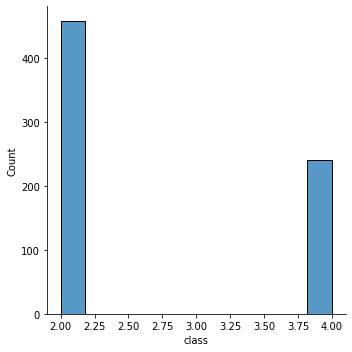

In [148]:
sns.displot(df['class'])

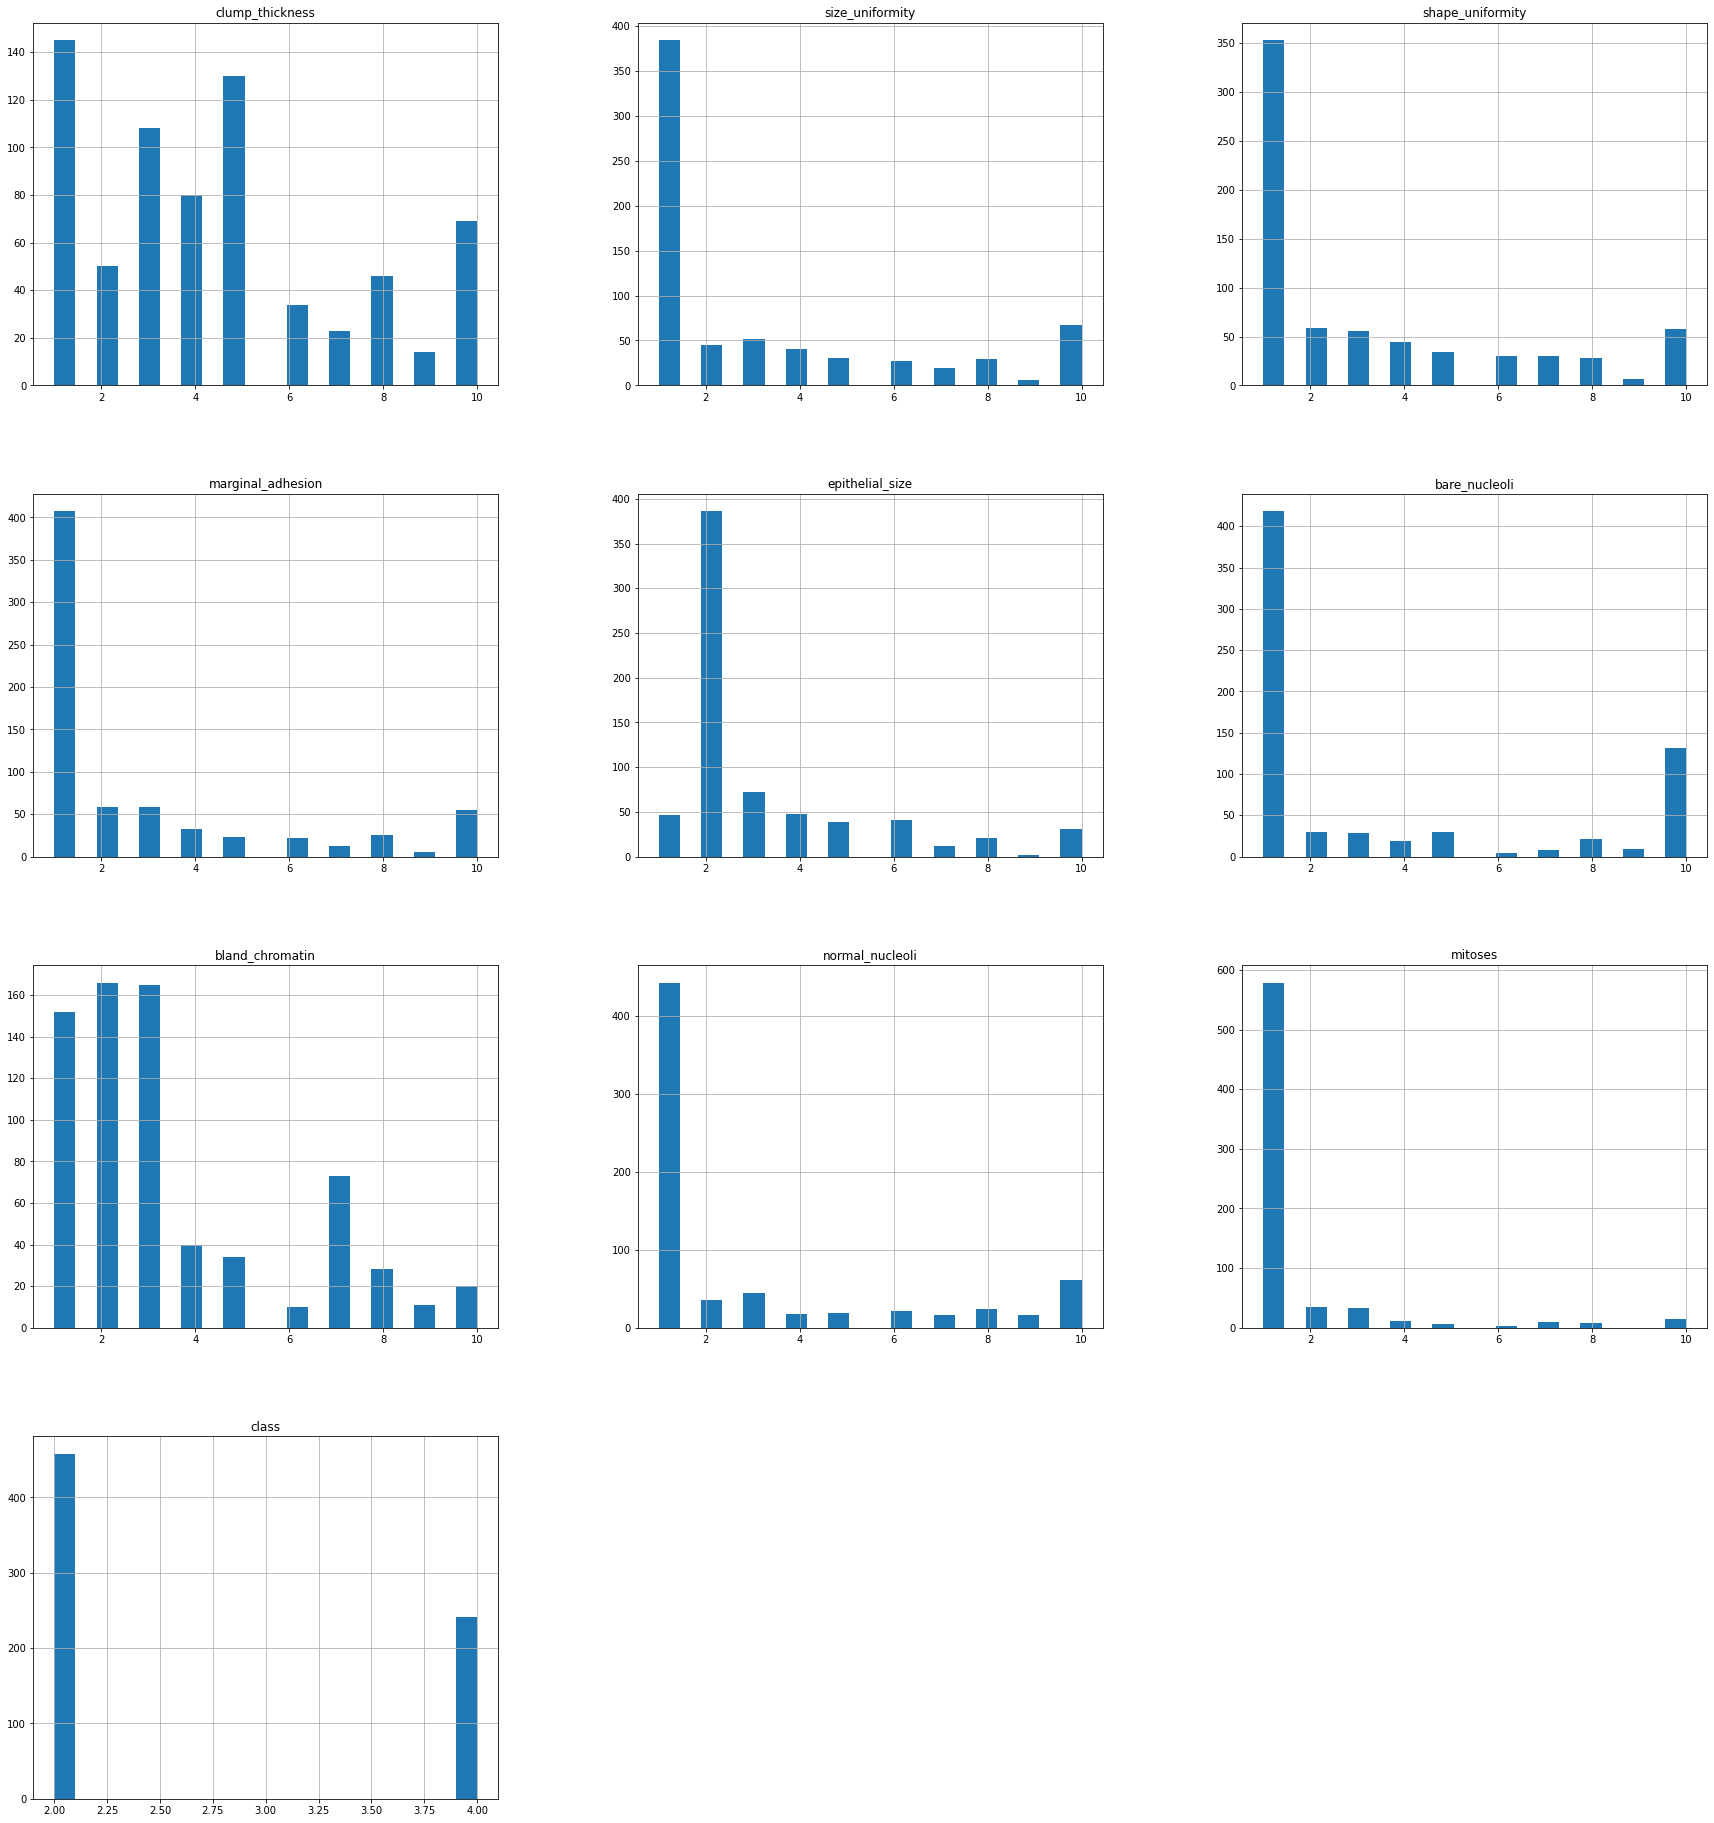

In [149]:
df.hist(bins=20, figsize=(30,50), layout=(6,3));

<AxesSubplot:>

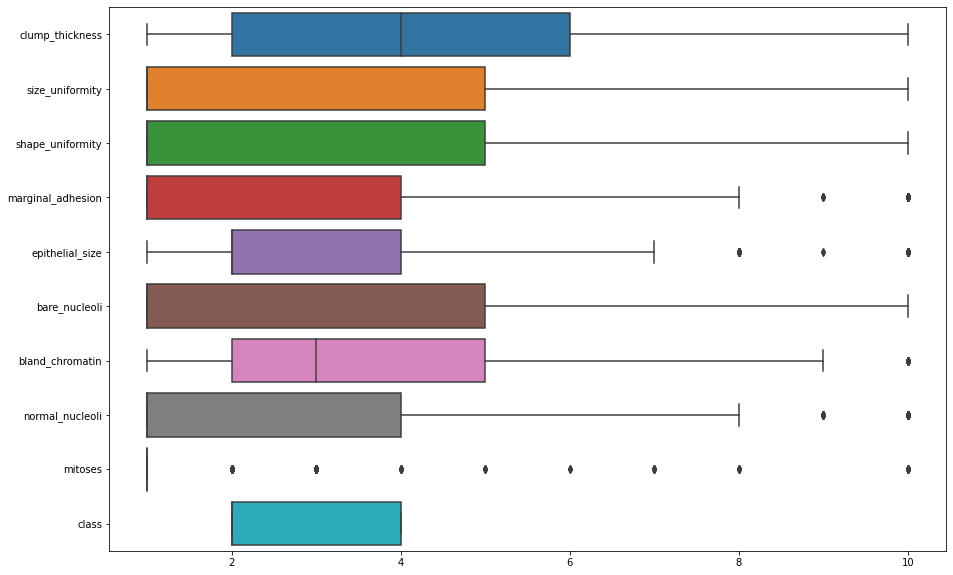

In [150]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient='h')

In [151]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


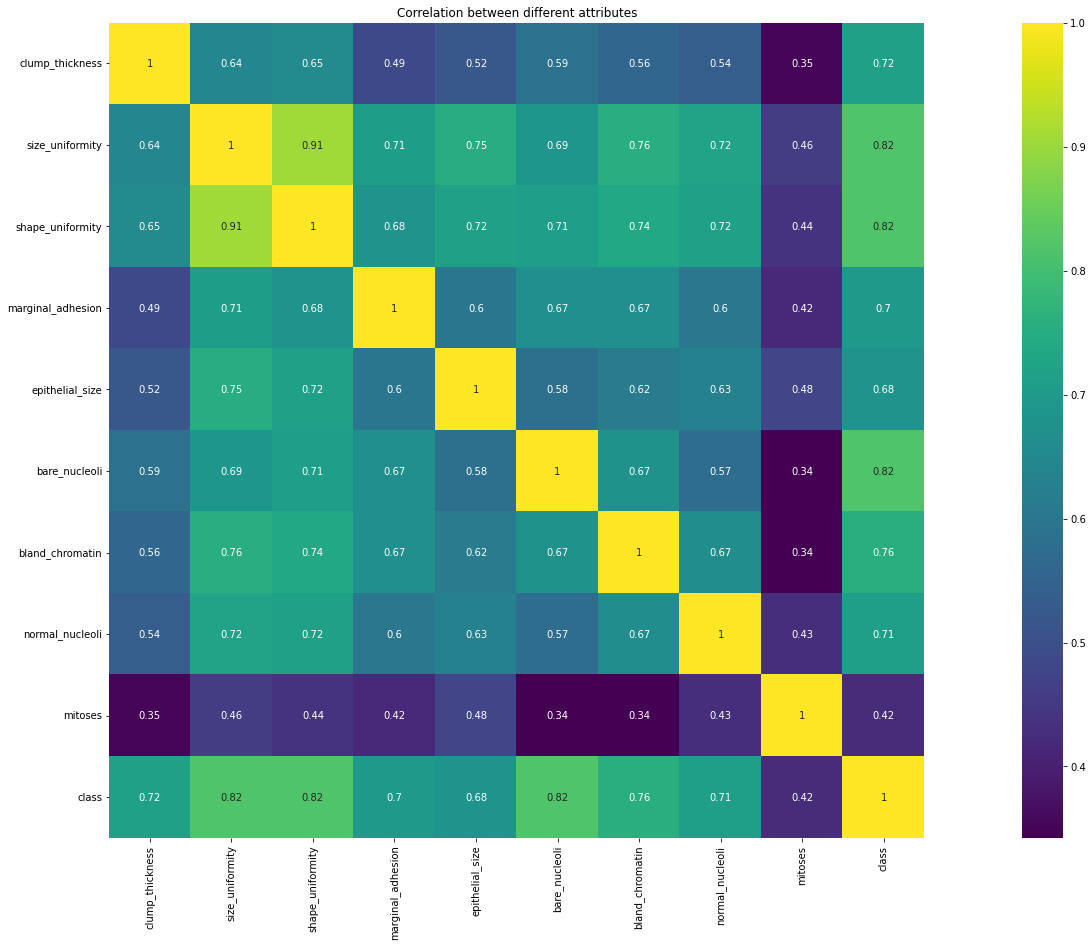

In [152]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis');
plt.title('Correlation between different attributes')
plt.show()

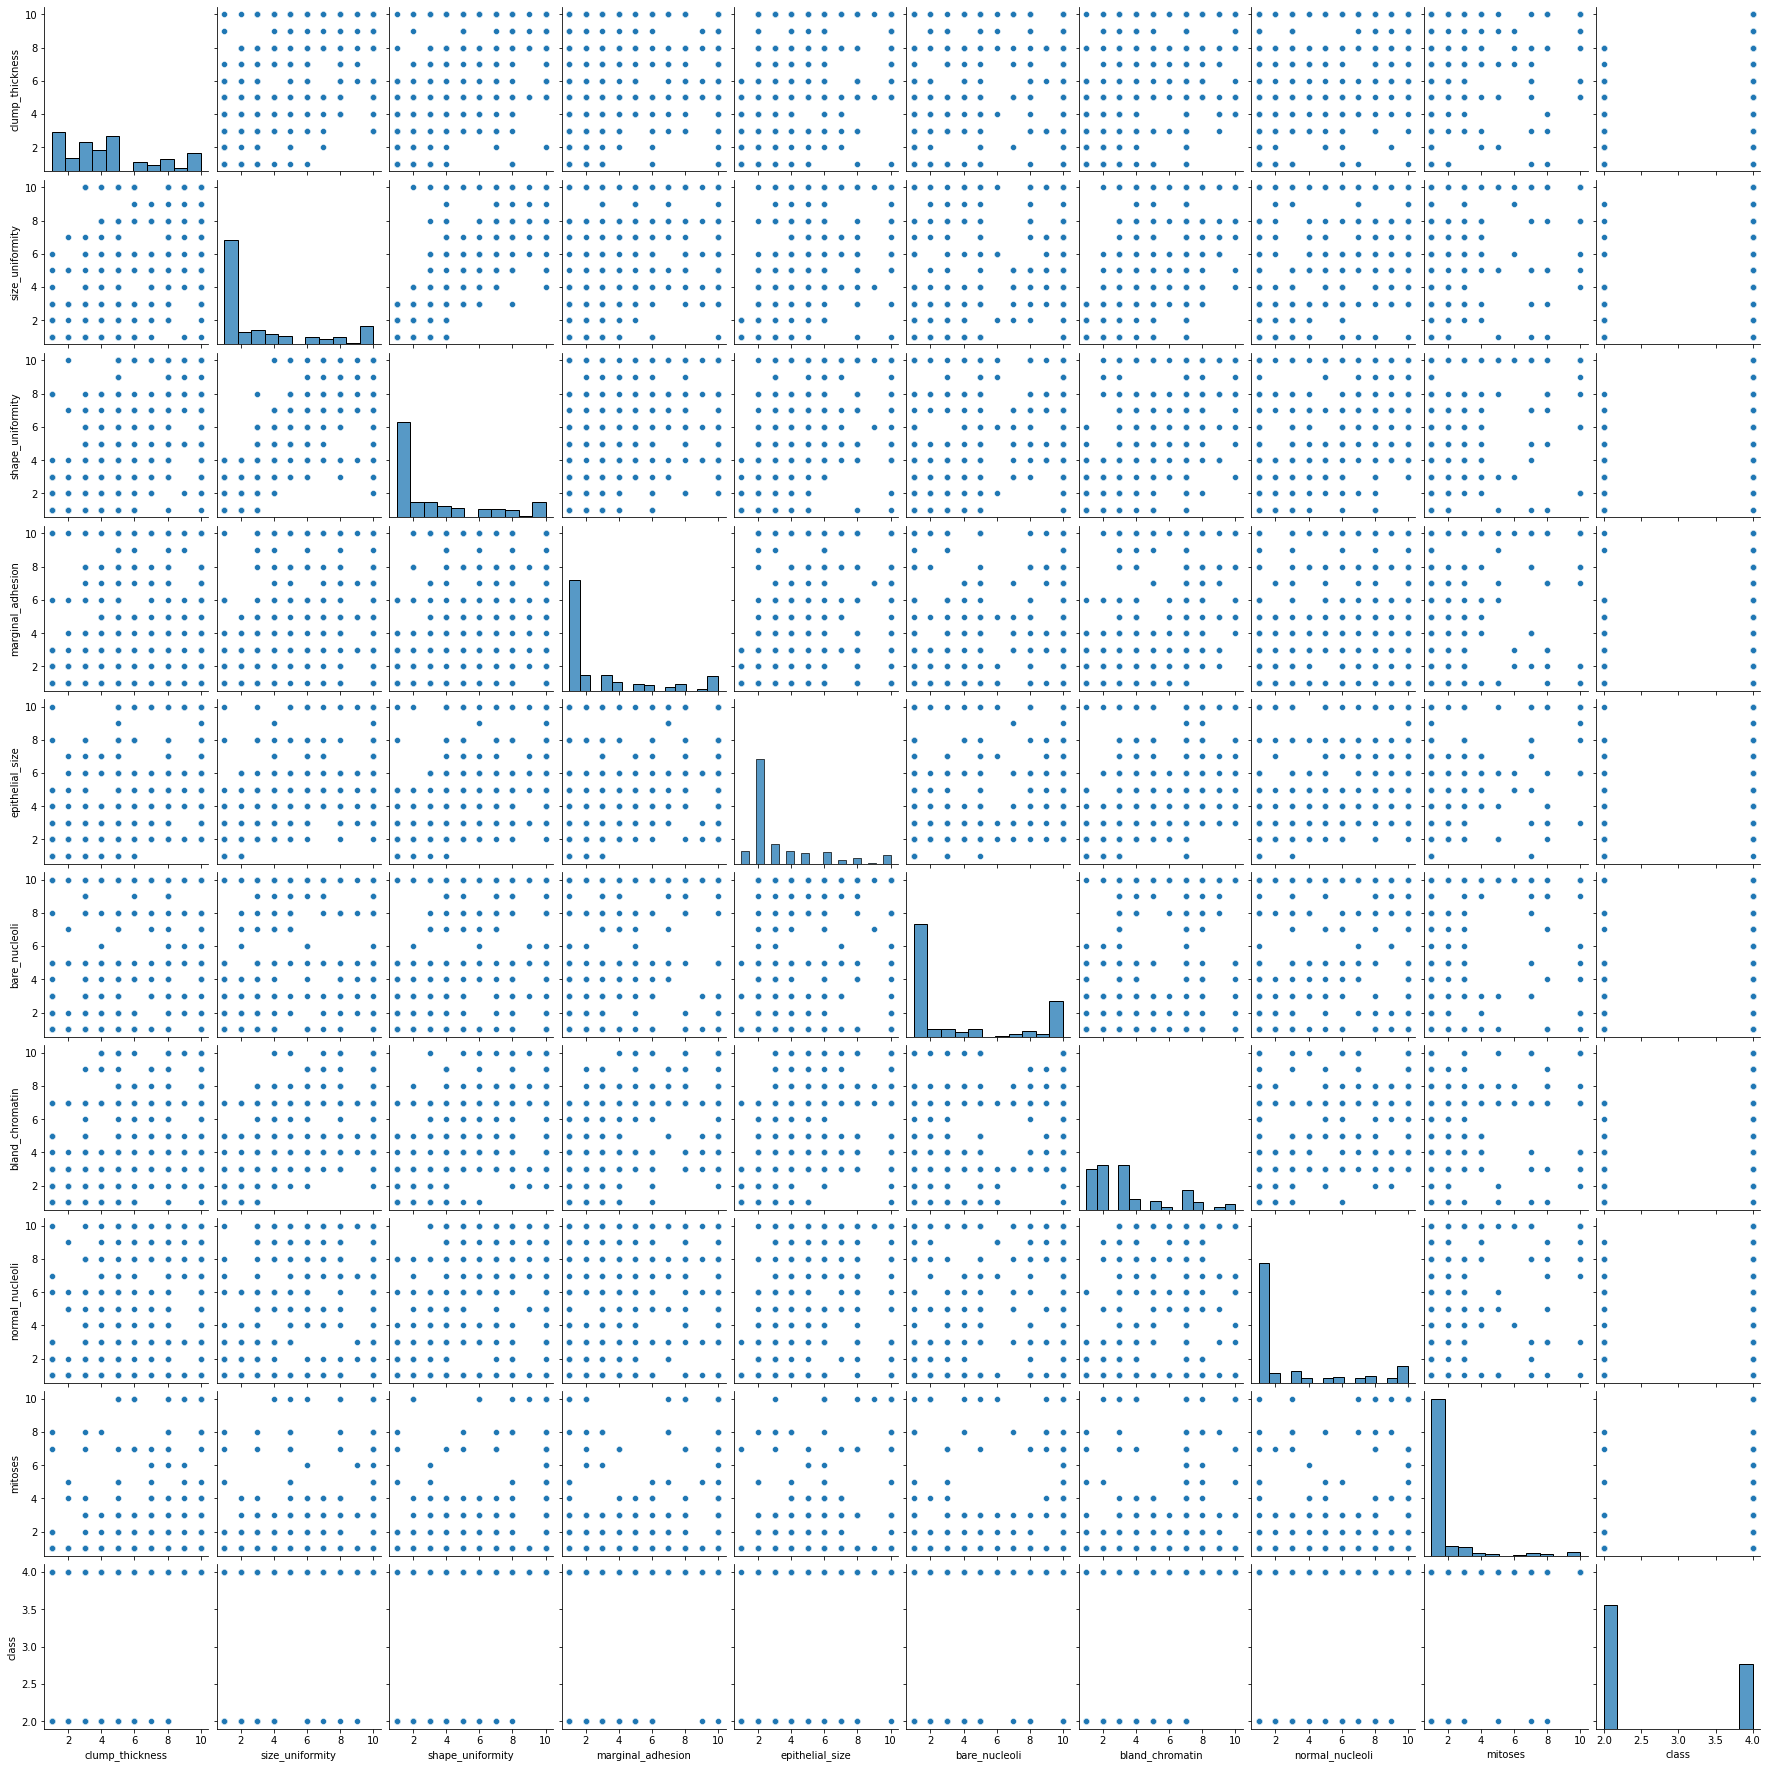

In [157]:
sns.pairplot(df);

### Building Models

In [158]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [159]:
# separating features from target

X=df.drop('class',axis=1)
y=df['class']

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
# we wil split our data into two sets: 70:30
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.30, random_state=1) 

In [162]:
# Lets built the k-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

In [163]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [164]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [165]:
predicted_1 = KNN.predict(X_test)
predicted_1

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [166]:
from scipy.stats import zscore

print("KNeighborClassifier Algorithm is predicting at {0:.2f}%".format(KNN.score(X_test,y_test)*100))

KNeighborClassifier Algorithm is predicting at 97.14%


In [167]:
from sklearn.svm import SVC

svc = SVC(gamma=0.025, C=3)
svc.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

In [168]:
predicted_2 = svc.predict(X_test)
predicted_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2])

In [169]:
print("SVMClassifier Algorithm is predicting at {0:.2f}%".format(svc.score(X_test,y_test)*100))

SVMClassifier Algorithm is predicting at 98.10%


In [170]:
knn_predictions = pd.DataFrame(predicted_1)
svc_predictions = pd.DataFrame(predicted_2)

In [171]:
df1=pd.concat([knn_predictions,svc_predictions], axis=1)
df1

,0,0
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
5,2,2
6,4,4
7,2,2
8,2,2
9,2,2


In [172]:
df1.columns = ['knn_predictions', 'svc_predictions']
df1

,knn_predictions,svc_predictions
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
5,2,2
6,4,4
7,2,2
8,2,2
9,2,2


In [173]:
from sklearn.metrics import classification_report
print("KNN performance:")
print('....'*10)
print(classification_report(y_test, predicted_1))

KNN performance:
........................................
              precision    recall  f1-score   support

           2       0.96      0.99      0.98       137
           4       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



In [174]:
print("SVM performance:")
print('....'*10)
print(classification_report(y_test, predicted_2))

SVM performance:
........................................
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



Confusuion matrix for Knn


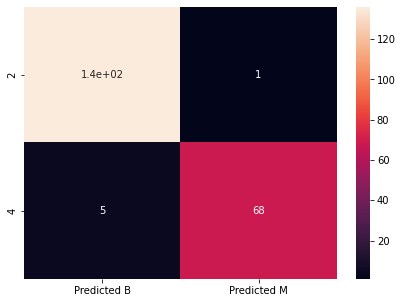

In [178]:
from sklearn import metrics

print('Confusuion matrix for Knn')
cm=metrics.confusion_matrix(y_test,predictted_1, labels=[2,4])
df_cm=pd.DataFrame(cm, index=[i for i in [2,4]], columns=[i for i in ['Predicted B', 'Predicted M']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True);

Confusuion matrix for SVM


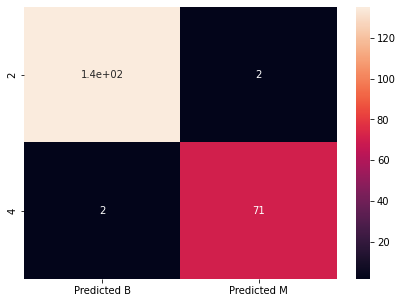

In [180]:
from sklearn import metrics

print('Confusuion matrix for SVM')
cm=metrics.confusion_matrix(y_test,predicted_2, labels=[2,4])
df_cm=pd.DataFrame(cm, index=[i for i in [2,4]], columns=[i for i in ['Predicted B', 'Predicted M']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True);